In [1]:
#Importing Necesssary Libraries
import os
import pickle
import csv
from PIL import Image
import math
import matplotlib.pyplot as plt
import random
import cv2 as cv
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
import shutil as sh


print('All modules imported.')

All modules imported.


In [2]:
#Paths of the Dataset

#data_dir = '/Users/doruk/Desktop/CS554-Project/GTSBR'
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3 #RGB



In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

13

In [4]:
#Class Labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [5]:
#Class Distribution function
path = 'Train_all'
path_folders = os.listdir(path)

def class_distribution(folders,train_path,classes):
    train_number = []
    class_num = []

    for folder in folders:
        train_files = os.listdir(train_path + '/' + folder)
        train_number.append(len(train_files))
        class_num.append(classes[int(folder)])

    # Sorting the dataset on the basis of number of images in each class
    zipped_lists = zip(train_number, class_num)
    sorted_pairs = sorted(zipped_lists)
    tuples = zip(*sorted_pairs)
    train_number, class_num = [ list(tuple) for tuple in  tuples]

    # Plotting the number of images in each class
    plt.figure(figsize=(21,10))  
    plt.bar(class_num, train_number)
    plt.xticks(class_num, rotation='vertical')
    plt.show()



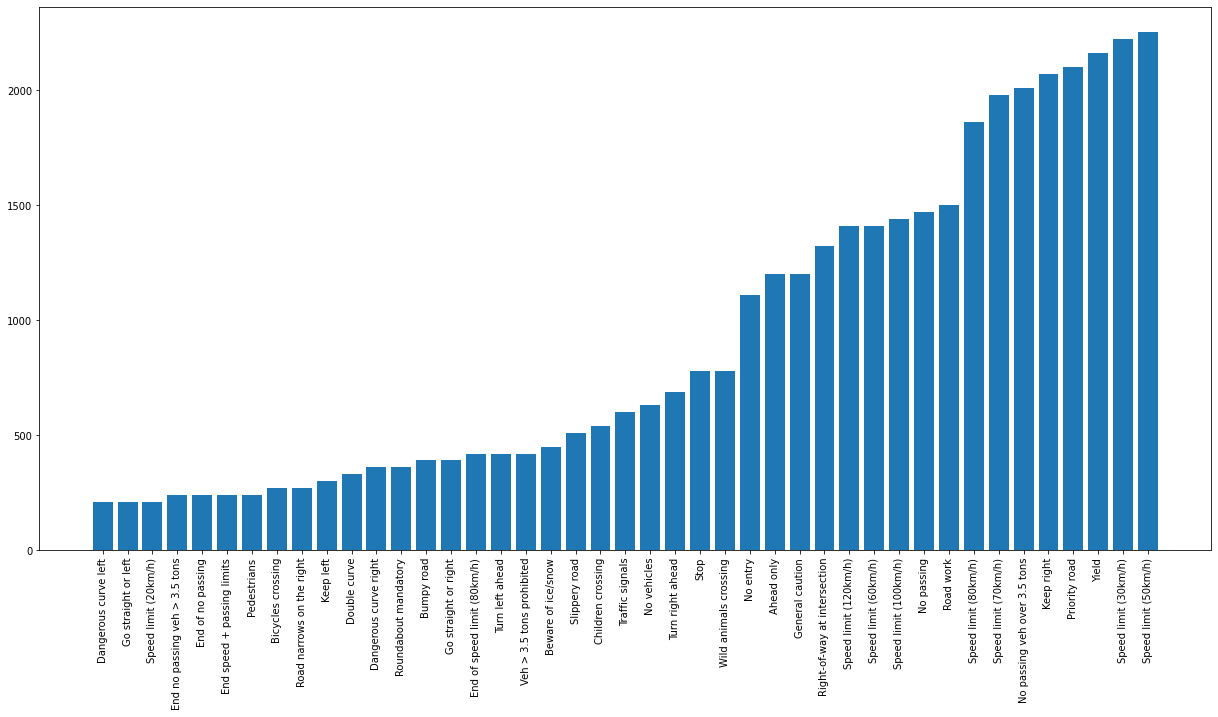

In [6]:
#Class Distributions
class_distribution(path_folders,path,classes)

In [7]:
#Loading Train Data
train_df = pd.read_csv("Train.csv")
train_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [8]:
#Masking Train Data
train_reduced_df = train_df[train_df.ClassId.isin([1,2,8,9,10,12,13,14,17,33,34,36,37])]
train_reduced_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
570,56,57,6,5,51,52,1,Train/1/00001_00000_00000.png
571,55,57,5,6,50,52,1,Train/1/00001_00000_00001.png
572,56,56,5,6,51,51,1,Train/1/00001_00000_00002.png
573,58,58,6,6,53,52,1,Train/1/00001_00000_00003.png
574,59,59,6,6,54,53,1,Train/1/00001_00000_00004.png
575,57,59,5,6,52,54,1,Train/1/00001_00000_00005.png
576,57,59,5,5,52,54,1,Train/1/00001_00000_00006.png
577,57,59,5,5,52,53,1,Train/1/00001_00000_00007.png
578,60,60,6,6,54,54,1,Train/1/00001_00000_00008.png
579,61,61,5,6,55,56,1,Train/1/00001_00000_00009.png


In [9]:
#Converting dataframe to csv and saving to path
train_reduced_df.to_csv("Train_reduced.csv")


In [10]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

13

In [11]:
#Reduced Class Labels

classes_reduced ={
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            17:'No entry',
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            36:'Go straight or right', 
            37:'Go straight or left',
            }

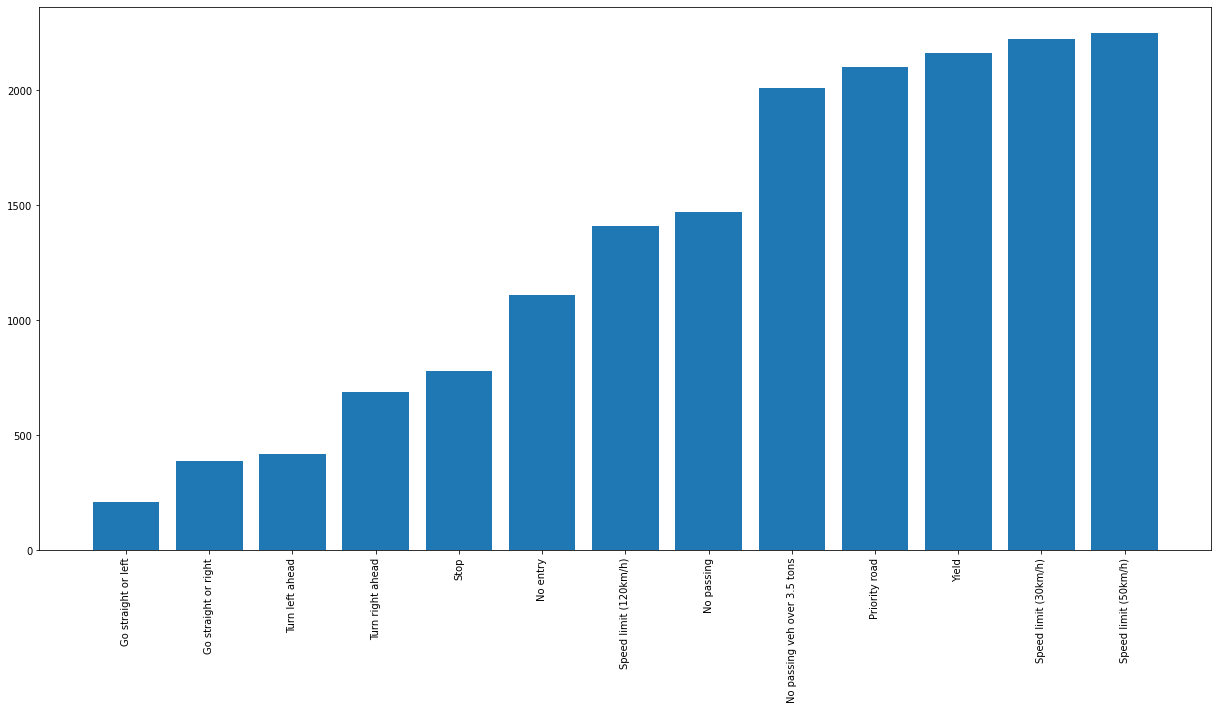

In [12]:
#Reduced Class Distributions
path = 'Train'
path_folders = os.listdir(path)
class_distribution(path_folders,path,classes_reduced)

In [14]:
#Loading Test Data
test_df = pd.read_csv('/Users/doruk/Desktop/CS554-Project/GTSBR/Test.csv')
test_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [16]:
#Masking Test Data
test_reduced_df = test_df[test_df.ClassId.isin([1,2,8,9,10,12,13,14,17,33,34,36,37])]
test_reduced_df.head(10)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
1,42,45,5,5,36,40,1,Test/00001.png
3,27,29,5,5,22,24,33,Test/00003.png
7,32,33,5,5,26,28,12,Test/00007.png
10,38,37,6,5,33,32,12,Test/00010.png
15,27,27,6,6,22,22,9,Test/00015.png
21,52,55,5,6,47,49,33,Test/00021.png
22,116,120,10,11,106,110,9,Test/00022.png
24,59,65,5,6,54,60,1,Test/00024.png
26,56,49,5,6,51,43,13,Test/00026.png
27,28,29,5,6,23,24,10,Test/00027.png


In [17]:
#Converting dataframe to csv and saving to path
test_reduced_df.to_csv("./GTSBR/Test_reduced.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Test/00165.png'

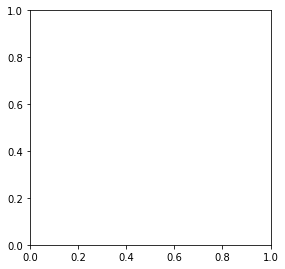

In [13]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv('Test_reduced.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

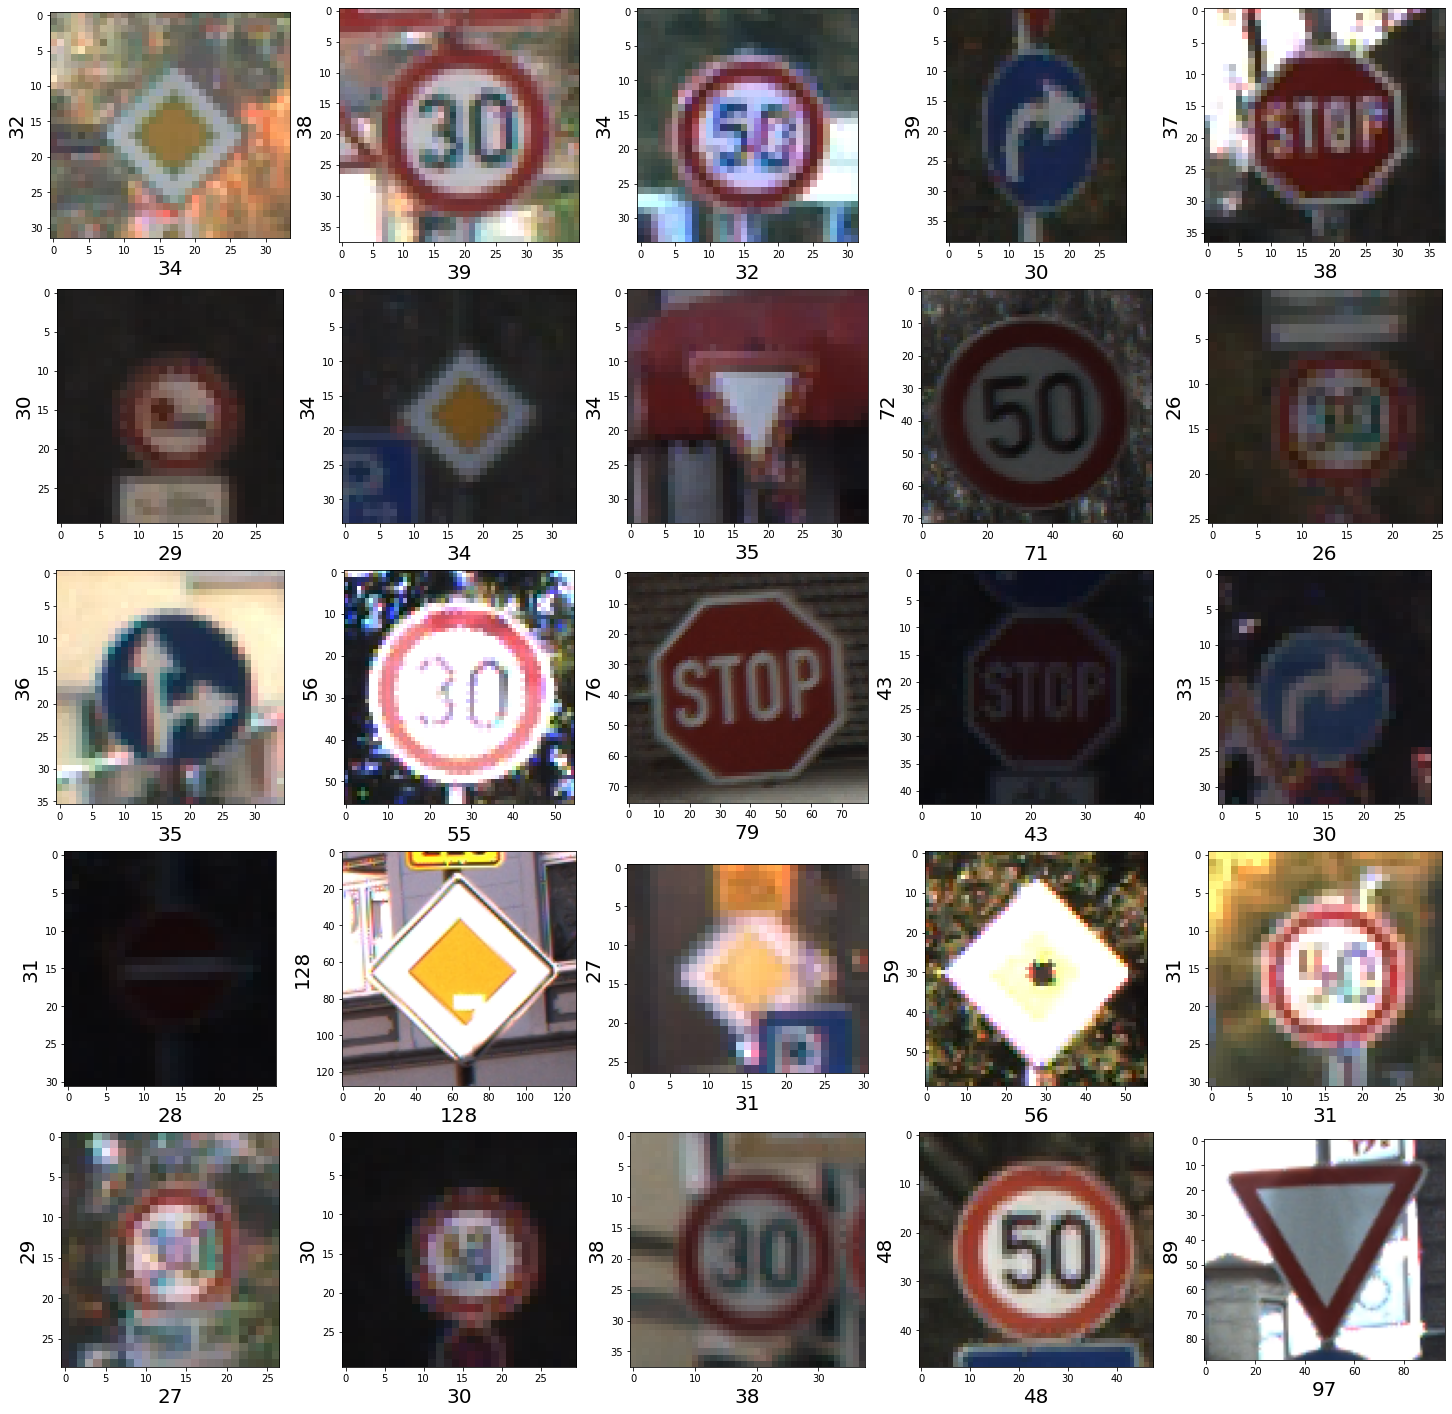

In [20]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

train = pd.read_csv('Train_reduced.csv')
imgs = train["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

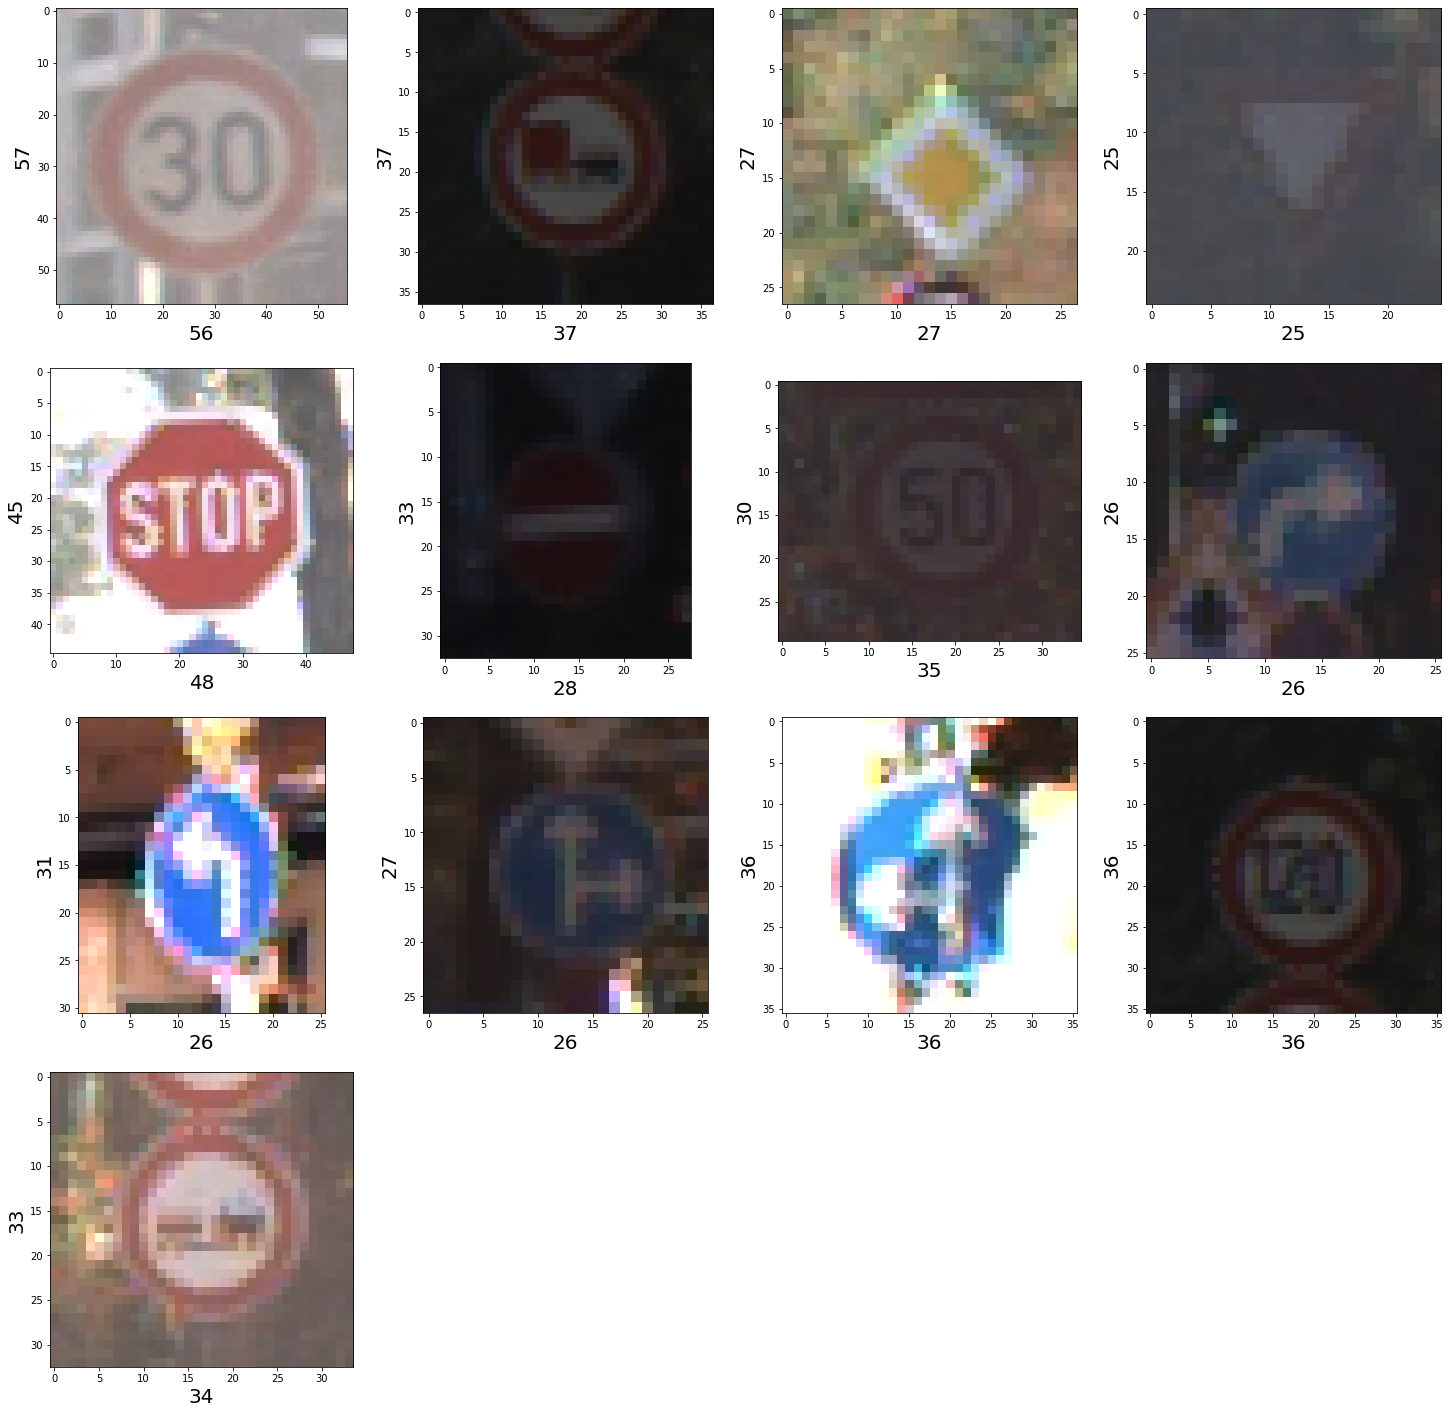

In [29]:
dir = os.listdir(train_path)
    

# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

train = pd.read_csv('Train_reduced.csv')
imgs = train["Path"].values

plt.figure(figsize=(25,25))


for d,i in zip(dir,range(1,14)):
    plt.subplot(4,4,i)
    if int(d) < 10:
        rand_img = imread('Train/{}/0000{}_00000_00000.png'.format(d,d))
    else :
        rand_img = imread('Train/{}/000{}_00000_00000.png'.format(d,d))

    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

# With these figures, we saw that the dimensions of the train dataset images are not the same

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 1.11.0+cu113 CUDA: True


In [4]:
device = torch.device("cuda")
device

device(type='cuda')

In [5]:
# image_size = (32,32)

# transformations = transforms.Compose(
#         [transforms.Resize(list(image_size)),
#             transforms.Grayscale(num_output_channels=1), transforms.ToTensor(),
#          transforms.Normalize(mean=[0.5], std=[0.5])])

In [5]:
image_size = (32,32)

transformations = transforms.Compose(
        [transforms.Resize(list(image_size)),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.5], std=[0.5])])

In [6]:
batch_size = 130 

train_set = datasets.ImageFolder('Train', transform = transformations)

# YOUR CODE HERE for the DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=8)

In [7]:
# Get input/output from data loader
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([130, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([130]) type: torch.LongTensor


In [70]:
import cv2 as cv

cv.imshow(X_train[1,:,:,:].numpy().reshape(3,32,32),0)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - Can't convert object of type 'numpy.ndarray' to 'str' for 'winname'
>  - Can't convert object of type 'numpy.ndarray' to 'str' for 'winname'
>  - Can't convert object of type 'numpy.ndarray' to 'str' for 'winname'


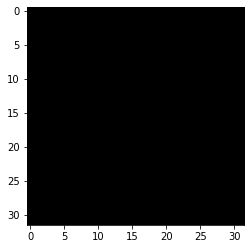

In [76]:
from PIL import Image

image = Image.fromarray(X_train[1,:,:,:].numpy().astype(np.uint8).reshape(32,32,3))
plt.imshow(image)

In [66]:
X_train[1,:,1,1].numpy()

array([-0.05882353, -0.23137254, -0.6156863 ], dtype=float32)

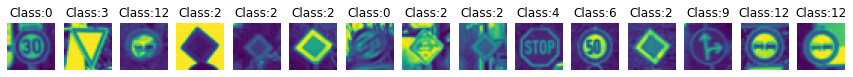

In [9]:
# YOUR CODE HERE for plotting the images
pltsize=1
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(15):
    plt.subplot(1,15,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(32,32))
    plt.title('Class:'+str(y_train[i].numpy()))

In [8]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # Dropout to avoid overfitting
        self.drop_out = nn.Dropout()

        # Fully connected layers
        self.fc1 = nn.Linear(800, 32)
        self.fc2 = nn.Linear(32, 13)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        # Flatten
        out = out.view(out.size(0), -1)

        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [11]:
# Declaring the loss function and optimizer

model = CNN()
model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
# loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer = # YOUR CODE HERE : Explore on optimizer and define with the learning rate
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=800, out_features=32, bias=True)
  (fc2): Linear

In [12]:
# YOUR CODE HERE. This will take time

# Record loss and accuracy of the train dataset
def train(epoch, log_interval=100):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.float())
        target = Variable(target)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = target.size(0)
        _, predicted = torch.max(output.data, 1)
        correct = (predicted == target).sum().item()        

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), (correct / total) * 100))

In [16]:
%%time
epochs = 6
lossv, accv = [], []
for epoch in range(1, epochs+1):
    train(epoch)
    # test(lossv, accv)

In [127]:
torch.save(model.state_dict(), 'conv_net_model.ckpt')

In [14]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([1, 3, 470, 446], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(3, 64, kernel_size=[7, 7], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

In [15]:
torch.backends.cudnn.version()

8200

In [128]:
# Load the model
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('conv_net_model.ckpt'))
loaded_model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linea

In [129]:
# Testing Evaluation for CNN model

val_set = datasets.ImageFolder('Test',transform = transformations)

# YOUR CODE HERE for the DataLoader
test_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=8)

In [130]:
# Get input/output from data loader
for (X_test, y_test) in test_loader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    break

X_test: torch.Size([130, 1, 32, 32]) type: torch.FloatTensor
y_test: torch.Size([130]) type: torch.LongTensor


In [131]:
# YOUR CODE HERE for calculating the accuracy
loaded_model.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    # images, labels = images.to(device), labels.to(device)
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct // total))

Test Accuracy of the model on test images: 98.0000 %


<ipython-input-131-c7e363e2394e>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct // total))


In [1]:
import torch
  
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system? True
CUDA version: 11.3
ID of current CUDA device: 0
Name of current CUDA device:NVIDIA GeForce GTX 1650 Ti
